# Question 1

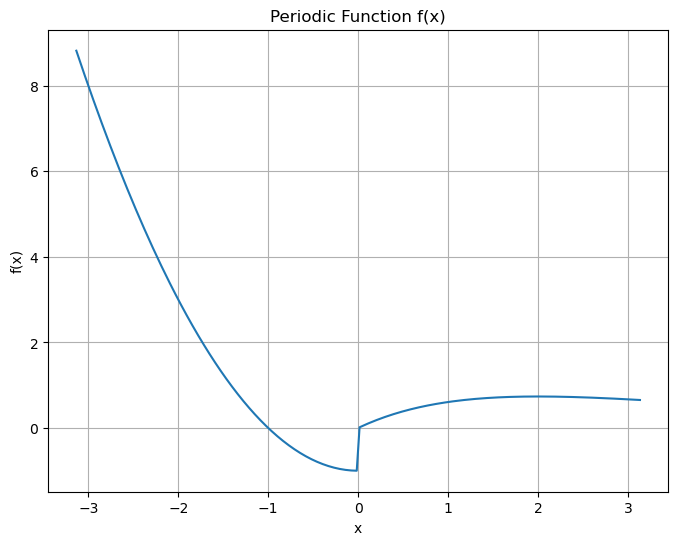

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    if -np.pi <= x<0: #defining the function and the range from -pi to 0
        return x**2 - 1;
    elif 0 <= x <= np.pi: #second function with the range 
        return x * np.exp(-x/2)
    else:
        return None
    
#Plotting the periodic function f(x) over the domain

x = np.linspace(-2*np.pi, 2*np.pi, 400)#creates 400 evenly spaced values between -2pi to 2pi in an array

#uses a list comprehension where it loops through each xi value in x array and calculates the corresponding y 
#value by calling the function f(xi)
y = [f(xi) for xi in x]

plt.figure(figsize=(8, 6)) #creates a figure plot of 6 x 8 inches
plt.plot(x, y) #creates the plot of the periodic function
plt.title("Periodic Function f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

In [4]:
def a_n(n):
    return (1/np.pi) * quad(lambda x: f(x)*np.cos(n*x), -np.pi, np.pi)[0]

def b_n(n):
    return (1/np.pi) * quad(lambda x: f(x)*np.sin(n*x), -np.pi, np.pi)[0]


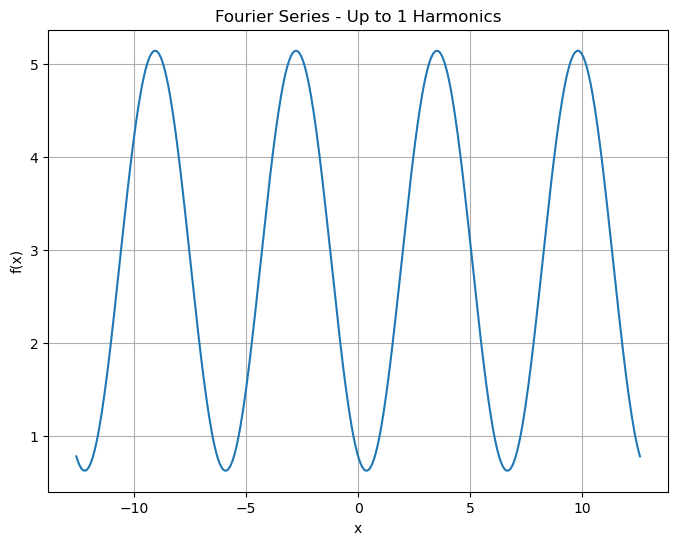

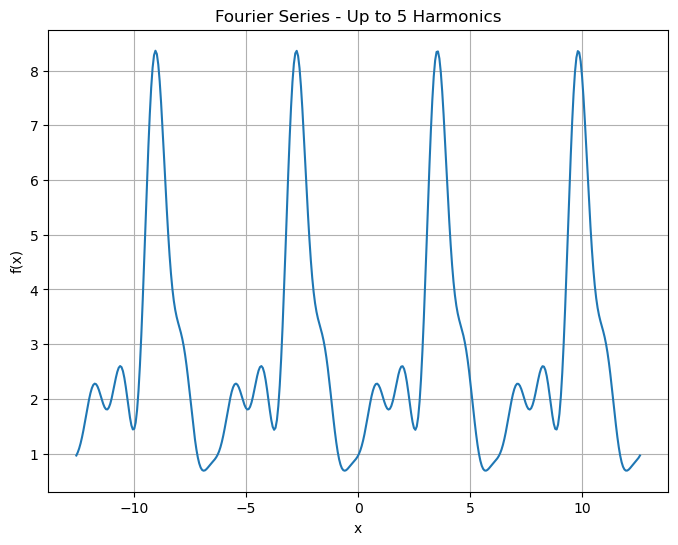

C:\Users\USER\AppData\Local\Temp\ipykernel_18284\718923505.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/np.pi) * quad(lambda x: f(x)*np.cos(n*x), -np.pi, np.pi)[0]
C:\Users\USER\AppData\Local\Temp\ipykernel_18284\718923505.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up

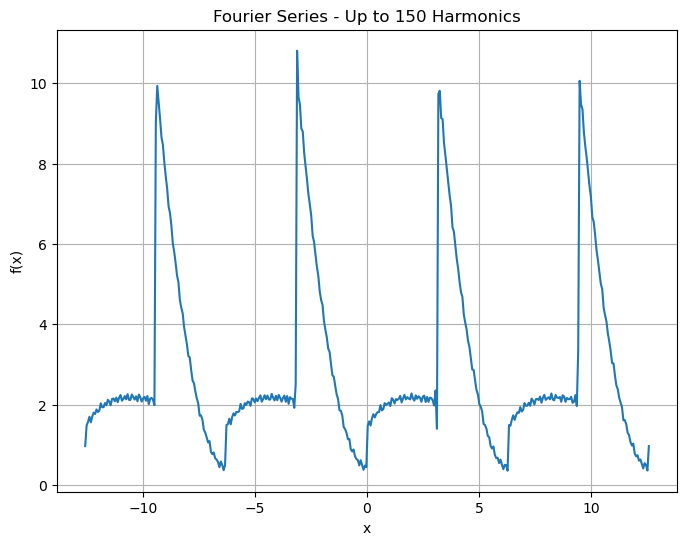

In [5]:
def fourier_series(n_max, x):
    a0 = a_n(0)
    partialSums = a0
    for n in range(1, n_max+1):
        try:
            partialSums += a_n(n) * np.cos(n*x) + b_n(n) * np.sin(n*x)
        except:
            print(f"Stopped at n = {n}")
            break
    return partialSums

x = np.linspace(-4*np.pi, 4*np.pi, 400)
for n_max in [1, 5, 150]:
    y = fourier_series(n_max, x)
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    plt.title(f"Fourier Series - Up to {n_max} Harmonics")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.show()


In [ ]:
def rmse(y, y_hat):
    # Only consider indices where both y and y_hat are not None
    indices = [i for i in range(len(y)) if y[i] is not None and y_hat[i] is not None]
    y = np.array([y[i] for i in indices])
    y_hat = np.array([y_hat[i] for i in indices])
    return np.sqrt(np.mean((y - y_hat)**2))

y = np.array([f(xi) for xi in x])
rmse_values = []
for n_max in range(151):
    y_hat = np.array([fourier_series(n_max, xi) for xi in x])
    rmse_values.append(rmse(y, y_hat))

plt.figure(figsize=(8, 6))
plt.plot(range(151), rmse_values)
plt.title("RMSE for 0th to 150th Harmonic")
plt.xlabel("Harmonic")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()


# Question 2


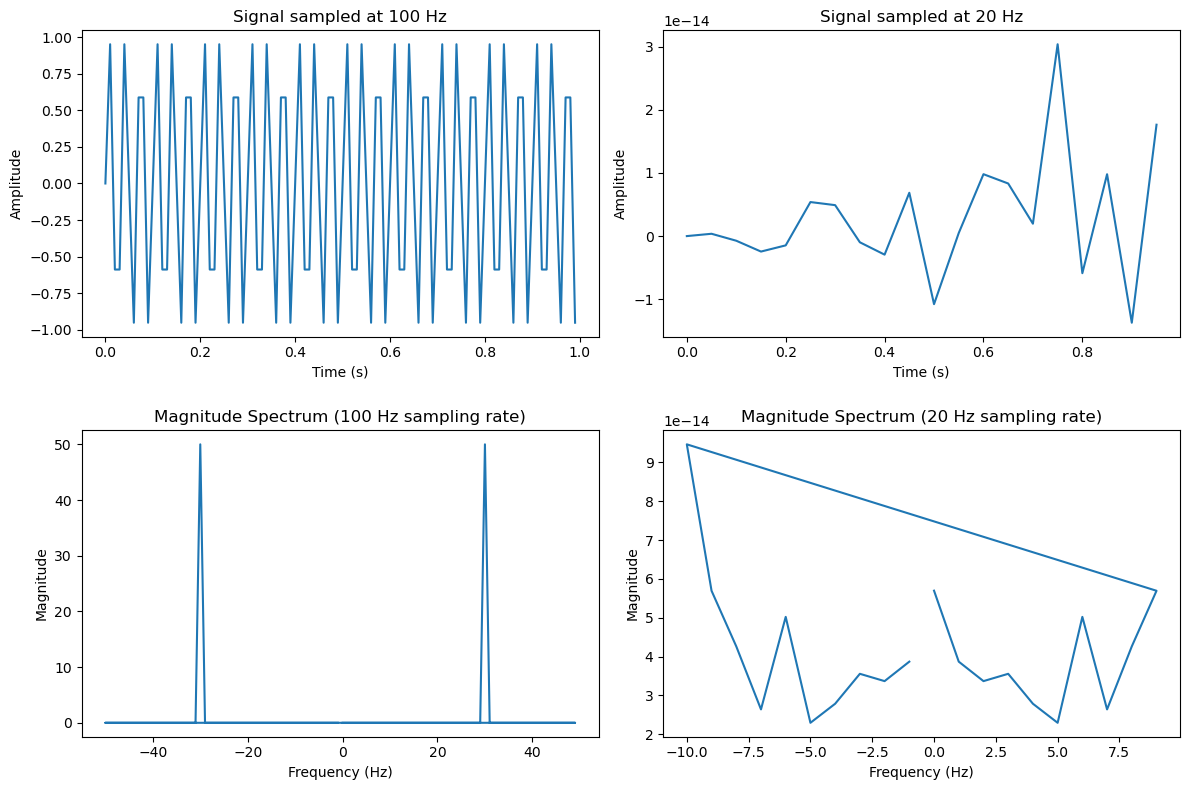

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling rates and signal frequency
sampling_rate_1 = 120  # This is above the Nyquist rate
sampling_rate_2 = 40  # This is below the Nyquist rate
frequency = 45

# Define the time axis for each sampling rate
t1 = np.arange(0, 1, 1/sampling_rate_1)  # Time axis for 100 Hz sampling
t2 = np.arange(0, 1, 1/sampling_rate_2)  # Time axis for 20 Hz sampling

# Generate two sine wave signals at the specified frequency
signal1 = np.sin(2 * np.pi * frequency * t1)  # Signal sampled at 100 Hz
signal2 = np.sin(2 * np.pi * frequency * t2)  # Signal sampled at 20 Hz

# Compute the Fast Fourier Transform (FFT) of the signals
fft1 = np.fft.fft(signal1)  # FFT of the 100 Hz sampled signal
fft2 = np.fft.fft(signal2)  # FFT of the 20 Hz sampled signal

# Create frequency axes for the FFT results
freq1 = np.fft.fftfreq(len(fft1), 1/sampling_rate_1)  # Frequency axis for 100 Hz sampled signal
freq2 = np.fft.fftfreq(len(fft2), 1/sampling_rate_2)  # Frequency axis for 20 Hz sampled signal

# Create a figure to display the signals and their magnitude spectra
plt.figure(figsize=(12, 8))

# Plot the first signal sampled at 100 Hz
plt.subplot(2, 2, 1)
plt.plot(t1, signal1)
plt.title('Signal sampled at 100 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the second signal sampled at 20 Hz
plt.subplot(2, 2, 2)
plt.plot(t2, signal2)
plt.title('Signal sampled at 20 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the magnitude spectrum of the first signal (100 Hz sampling rate)
plt.subplot(2, 2, 3)
plt.plot(freq1, np.abs(fft1))
plt.title('Magnitude Spectrum (100 Hz sampling rate)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot the magnitude spectrum of the second signal (20 Hz sampling rate)
plt.subplot(2, 2, 4)
plt.plot(freq2, np.abs(fft2))
plt.title('Magnitude Spectrum (20 Hz sampling rate)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Adjust the layout of subplots and display the figure
plt.tight_layout()
plt.show()
